# Toán UDTK | Project 4: Linear Regression

**Sinh viên thực hiện:**   

**MSSV: 23120262**

**MSSV: Tống Dương Thái Hòa**

**Giáo viên hướng dẫn:**  

CN. Võ Nam Thục Đoan

ThS. Trần Hà Sơn

ThS. Nguyễn Hữu Toàn

Lê Trọng Anh Tú

## Nội dung đồ án

**Bài toán:** Xây dựng mô hình đánh giá chất lượng rượu vang (thang điểm 1-10) dựa trên 11 tính chất hóa học khác nhau từ file `wine.csv` bằng phương pháp Hồi quy Tuyến tính (Linear Regression).

**File dữ liệu:** `wine.csv` - chứa dữ liệu đánh giá chất lượng của 1199 chai rượu vang.

**Yêu cầu:**
a. Xây dựng mô hình sử dụng toàn bộ 11 đặc trưng (thuộc tính).
b. Xây dựng mô hình sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất (đánh giá bằng RSS).
c. Xây dựng một mô hình tùy chỉnh (chọn lọc đặc trưng) cho kết quả tốt nhất.

---

## 1. Thuật toán Hồi quy Tuyến tính (OLS)

### a. Mô hình hồi quy đơn (Simple Linear Regression):
Sử dụng một biến độc lập X để dự đoán biến phụ thuộc Y.

- **Dữ liệu:** $(x_1, y_1), (x_2, y_2), \cdots ,(x_n, y_n)$
- **Mô hình:** $Y = \beta_0 + \beta_1 X + \epsilon$
  - $\beta_0$: Hệ số chặn (intercept) - giá trị của Y khi X = 0.
  - $\beta_1$: Hệ số góc (slope) - mức độ thay đổi của Y khi X thay đổi 1 đơn vị.
  - $\epsilon$: Sai số ngẫu nhiên.
- **Mục tiêu:** Tìm $\hat{\beta}_0$ và $\hat{\beta}_1$ sao cho tổng bình phương sai số (Residual Sum of Squares - RSS) là nhỏ nhất:
  $L(\beta_0, \beta_1) = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - (\beta_0 + \beta_1 x_i))^2 \rightarrow \min$
- **Công thức OLS cho hồi quy đơn:**
  - $\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{\sum_{i=1}^{n} x_i y_i - \frac{1}{n} (\sum_{i=1}^{n} x_i) (\sum_{i=1}^{n} y_i)}{\sum_{i=1}^{n} x_i^2 - \frac{1}{n} (\sum_{i=1}^{n} x_i)^2}$
  - $\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} = \frac{1}{n} \sum_{i=1}^{n} y_i - \hat{\beta_1} (\frac{1}{n} \sum_{i=1}^{n} x_i)$

### b. Mô hình hồi quy bội (Multiple Linear Regression):
Sử dụng nhiều biến độc lập $X_1, X_2, \cdots, X_k$ để dự đoán biến phụ thuộc Y.

- **Mô hình:** $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \epsilon$
- **Dạng ma trận:** $Y = X\beta + \epsilon$
  - $Y$: Vector cột các giá trị biến phụ thuộc (n x 1).
  - $X$: Ma trận các giá trị biến độc lập, **có thêm cột giá trị 1 ở đầu** (n x (k+1)).
  - $\beta$: Vector cột các hệ số hồi quy cần ước lượng ((k+1) x 1).
  - $\epsilon$: Vector cột các sai số ngẫu nhiên (n x 1).
- **Ma trận dữ liệu:**
  $Y = \begin{bmatrix} Y_1\\ Y_2\\ \vdots\\ Y_n \end{bmatrix}$,
  $X = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1k}\\ 1 & x_{21} & x_{22} & \cdots & x_{2k}\\ \vdots & \vdots & \vdots & \ddots & \vdots\\ 1 & x_{n1} & x_{n2} & \cdots & x_{nk} \end{bmatrix}$,
  $\beta = \begin{bmatrix} \beta_0\\ \beta_1\\ \vdots\\ \beta_k \end{bmatrix}$,
  $\epsilon = \begin{bmatrix} \epsilon_1\\ \epsilon_2\\ \vdots\\ \epsilon_n \end{bmatrix}$
- **Mục tiêu:** Tìm vector hệ số $\hat{\beta}$ sao cho tổng bình phương sai số là nhỏ nhất.
- **Công thức OLS cho hồi quy bội (dạng ma trận):**
  $\hat{\beta} = (X^T X)^{-1} X^T Y$

---

## 2. Chuẩn bị dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('wine.csv')

# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng dữ liệu đầu tiên:")
print(df.head())
print("\n--------------------\n")

# Hiển thị thông tin tổng quan về DataFrame
print("Thông tin DataFrame:")
df.info()
print("\n--------------------\n")

# Hiển thị kích thước DataFrame
print(f"Kích thước DataFrame: {df.shape[0]} dòng x {df.shape[1]} cột")

df

5 dòng dữ liệu đầu tiên:
   "quality"  "fixed acidity"  "volatile acidity"  "citric acid"  \
0          5              7.4                0.70           0.00   
1          5              7.8                0.88           0.00   
2          5              7.8                0.76           0.04   
3          6             11.2                0.28           0.56   
4          5              7.4                0.70           0.00   

   "residual sugar"  "chlorides"  "free sulfur dioxide"  \
0               1.9        0.076                   11.0   
1               2.6        0.098                   25.0   
2               2.3        0.092                   15.0   
3               1.9        0.075                   17.0   
4               1.9        0.076                   11.0   

   "total sulfur dioxide"  "density"  "pH"  "sulphates"  "alcohol"  
0                      34     0.9978  3.51         0.56        9.4  
1                      67     0.9968  3.20         0.68        9.8  
2   

,"""quality""","""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol"""
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


Tiếp theo, ta cần làm sạch tên các cột, loại bỏ dấu ngoặc kép ("") và khoảng trắng thừa nếu có.

In [2]:
# Làm sạch tên cột: loại bỏ khoảng trắng thừa ở đầu/cuối
df.columns = df.columns.str.strip()

# Làm sạch tên cột: loại bỏ dấu "" và khoảng trắng thừa lần nữa
df.columns = df.columns.str.replace('"', '').str.strip()

# Hiển thị lại 5 dòng đầu với tên cột đã làm sạch
print("5 dòng dữ liệu đầu tiên với tên cột đã làm sạch:")
print(df.head())
print("\n--------------------\n")

# Hiển thị lại tên các cột
print("Tên cột sau khi làm sạch:")
print(df.columns.tolist())

df

5 dòng dữ liệu đầu tiên với tên cột đã làm sạch:
   quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        5            7.4              0.70         0.00             1.9   
1        5            7.8              0.88         0.00             2.6   
2        5            7.8              0.76         0.04             2.3   
3        6           11.2              0.28         0.56             1.9   
4        5            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                    34   0.9978  3.51   
1      0.098                 25.0                    67   0.9968  3.20   
2      0.092                 15.0                    54   0.9970  3.26   
3      0.075                 17.0                    60   0.9980  3.16   
4      0.076                 11.0                    34   0.9978  3.51   

   sulphates  alcohol  
0       0.56      9.4  
1

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


##### a. Xây dựng mô hình đánh giá chất lượng rượu sử dụng toàn bộ 11 đặc trưng:
Ở câu này, ta sẽ sử dụng mô hình hồi quy bội với thuật toán đã được giới thiệu ở **phần 1**.
- Ta sẽ code các hàm hỗ trợ cho việc tính toán.

Các hàm tính tổng (cho hồi quy đơn)


In [3]:
# Hàm tính tổng các phần tử trong một list
def custom_sum(X):
    """Tính tổng các phần tử trong list X."""
    total = 0
    for xi in X:
        total += xi
    return total

# Hàm tính tổng tích của hai list X và Y
def custom_sumXY(X, Y):
    """Tính tổng của tích từng cặp phần tử tương ứng trong X và Y."""
    total = 0
    for i in range(len(X)):
        total += X[i] * Y[i]
    return total

# Hàm tính tổng bình phương các phần tử trong một list
def custom_sum_sq(X):
    """Tính tổng bình phương các phần tử trong list X."""
    total = 0
    for xi in X:
        total += xi**2
    return total

# Hàm tính Residual Sum of Squares (RSS)
def residual_sum_of_squares(y_true, y_pred):
    """Tính tổng bình phương sai số."""
    rss = 0
    for i in range(len(y_true)):
        rss += (y_true[i] - y_pred[i]) ** 2
    return rss

Các hàm xử lý ma trận (cho hồi quy bội), đã được giới thiệu trong các bài lab trước.
- Hàm chuyển vị ma trận:

In [4]:
# Hàm chuyển vị ma trận (list of lists)
def trans_matrix(M):
    """Tính ma trận chuyển vị của M."""
    if not M:
        return []
    rows = len(M)
    cols = len(M[0])
    
    # Tạo ma trận chuyển vị với các phần tử ban đầu là 0 (hoặc None)
    transposed_matrix = [[0 for _ in range(rows)] for _ in range(cols)]

    # Lặp qua từng phần tử của ma trận ban đầu
    for i in range(rows):
        for j in range(cols):
            # Đặt giá trị của ma trận chuyển vị tại vị trí tương ứng
            transposed_matrix[j][i] = M[i][j]

    return transposed_matrix

- Hàm nhân 2 ma trận, phục vụ cho việc nhân $X^T X$ và $X^T Y$, nó được thiết kế để vừa có thể nhân ma trận với ma trận vừa có thể nhân ma trận với vector.

In [5]:
# Hàm nhân 2 ma trận (hoặc ma trận với vector cột)
def multiply_matrix(A_list, B_list):
    """Nhân ma trận A với ma trận B (hoặc vector cột B)."""
    # Kiểm tra B có phải là vector không (list thay vì list of lists)
    is_B_vector = not isinstance(B_list[0], list)

    # Nếu B là vector, chuyển nó thành ma trận cột
    if is_B_vector:
        B_matrix = [[b] for b in B_list]
    else:
        B_matrix = B_list

    rows_A = len(A_list)
    cols_A = len(A_list[0])
    rows_B = len(B_matrix)
    cols_B = len(B_matrix[0])

    # Kiểm tra kích thước có phù hợp để nhân không
    if cols_A != rows_B:
        raise ValueError("Số cột ma trận A phải bằng số dòng ma trận B")

    # Khởi tạo ma trận kết quả C
    C_list = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    # Thực hiện nhân ma trận
    for i in range(rows_A):
        for j in range(cols_B):
            total = 0
            for k in range(cols_A): # Hoặc range(rows_B)
                total += A_list[i][k] * B_matrix[k][j]
            C_list[i][j] = total

    # Nếu B ban đầu là vector, trả về kết quả dạng vector
    if is_B_vector:
        return [c[0] for c in C_list]
    else:
        return C_list

- Hàm tìm ma trận nghịch đảo đã được làm ở **Lab 2** giúp tìm $(X^T X)^{-1}$.

In [6]:
def get_identity_matrix(n):
    """Tạo ma trận đơn vị cấp n."""
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

def inverse_matrix(A):
    """Tính ma trận nghịch đảo của A bằng khử Gauss-Jordan."""
    n = len(A)
    if n == 0 or len(A[0]) != n:
        raise ValueError("Ma trận phải là ma trận vuông.")

    # Tạo ma trận mở rộng [A | I]
    # Sao chép A để tránh thay đổi ma trận gốc
    AM = [row[:] for row in A] 
    IM = get_identity_matrix(n)
    for i in range(n):
        AM[i].extend(IM[i])

    # Khử Gauss-Jordan
    for i in range(n):
        # Tìm pivot
        pivot = i
        for j in range(i + 1, n):
            if abs(AM[j][i]) > abs(AM[pivot][i]):
                pivot = j
        # Hoán đổi dòng nếu cần
        AM[i], AM[pivot] = AM[pivot], AM[i]

        # Kiểm tra ma trận có khả nghịch không (pivot == 0)
        if abs(AM[i][i]) < 1e-10: # Dùng ngưỡng nhỏ thay vì == 0 để tránh lỗi số thực
             raise ValueError("Ma trận không khả nghịch (ma trận suy biến).")

        # Chuẩn hóa dòng pivot (chia cho phần tử pivot để được 1)
        divisor = AM[i][i]
        for j in range(i, 2 * n):
            AM[i][j] /= divisor

        # Khử các phần tử khác trong cột i
        for j in range(n):
            if i != j:
                multiplier = AM[j][i]
                for k in range(i, 2 * n):
                    AM[j][k] -= multiplier * AM[i][k]

    # Trích xuất ma trận nghịch đảo từ phần bên phải của ma trận mở rộng
    A_inv = [row[n:] for row in AM]
    return A_inv

- Hàm thêm hệ số 1 vào ma trận X:

In [7]:
# Hàm thêm cột hệ số chặn (intercept) vào ma trận X
def add_intercept(X):
    """Thêm cột giá trị 1 vào đầu ma trận X."""
    return [[1] + row for row in X]

- Đây là hàm sẽ tổng hợp và tính toán theo các bước như đã mô tả trong thuật toán xây dựng mô hình hồi quy bội.

In [8]:
# Hàm tính hệ số hồi quy đơn (beta0, beta1)
def coef_singular(X_feature, Y):
    """Tính hệ số beta0, beta1 cho hồi quy tuyến tính đơn."""
    n = len(X_feature)
    if n == 0:
        return [0, 0]

    sum_x = custom_sum(X_feature)
    sum_y = custom_sum(Y)
    sum_xy = custom_sumXY(X_feature, Y)
    sum_x_sq = custom_sum_sq(X_feature)

    # Tính beta1
    numerator_b1 = sum_xy - (sum_x * sum_y) / n
    denominator_b1 = sum_x_sq - (sum_x**2) / n

    if abs(denominator_b1) < 1e-10: # Tránh chia cho 0
        # Xử lý trường hợp mẫu số gần bằng 0 (ví dụ: tất cả X giống nhau)
        # Có thể trả về lỗi, hoặc một giá trị mặc định như beta1=0
         raise ValueError("Mẫu số beta1 gần bằng 0, không thể tính hồi quy đơn.")
        # beta1 = 0 # Hoặc trả về lỗi

    beta1 = numerator_b1 / denominator_b1

    # Tính beta0
    mean_y = sum_y / n
    mean_x = sum_x / n
    beta0 = mean_y - beta1 * mean_x

    return [beta0, beta1]

- Hàm này dùng để in ra mô hình hồi quy bội.

In [9]:
# Hàm tính vector hệ số hồi quy bội (beta)
def coef_multiple(X_features, Y):
    """Tính vector hệ số beta cho hồi quy tuyến tính bội."""
    # Thêm cột intercept vào ma trận X
    X_with_intercept = add_intercept(X_features)

    # Bước 1: Tính X^T
    X_T = trans_matrix(X_with_intercept)

    # Bước 2: Tính X^T * X và X^T * Y
    XTX = multiply_matrix(X_T, X_with_intercept)
    XTY = multiply_matrix(X_T, Y) # Y là vector

    # Bước 3: Tính (X^T * X)^-1
    try:
      XTX_inv = inverse_matrix(XTX)
    except ValueError as e:
        print(f"Lỗi khi tính ma trận nghịch đảo: {e}")
        print("Có thể do các đặc trưng có tương quan tuyến tính cao (multicollinearity).")
        return None # Trả về None nếu không khả nghịch

    # Bước 4: Tính beta_hat = (X^T * X)^-1 * X^T * Y
    beta_hat = multiply_matrix(XTX_inv, XTY) # XTY là vector

    return beta_hat

- Các hàm hiển thị kết quả và vẽ đồ thị

In [10]:
# Hàm in phương trình hồi quy bội
def print_regression_model(feature_names, beta_hat):
    """In phương trình hồi quy tuyến tính bội."""
    if beta_hat is None:
        print("Không thể tính toán mô hình hồi quy.")
        return
        
    model = "quality = {:.4f}".format(beta_hat[0]) # beta0
    for i in range(1, len(beta_hat)):
        coefficient = beta_hat[i]
        feature = feature_names[i-1]
        if coefficient >= 0:
            model += " + {:.4f} * {}".format(coefficient, feature)
        else:
            model += " - {:.4f} * {}".format(abs(coefficient), feature)
    print(model)

# Hàm in phương trình hồi quy đơn
def print_model_singular(feature_name, beta):
    """In phương trình hồi quy tuyến tính đơn."""
    model = "quality = {:.4f}".format(beta[0]) # beta0
    if beta[1] >= 0:
        model += " + {:.4f} * {}".format(beta[1], feature_name)
    else:
        model += " - {:.4f} * {}".format(abs(beta[1]), feature_name)
    print(model)

# Hàm dự đoán giá trị y từ x cho hồi quy đơn
def predict_singular(x_values, coef):
    """Dự đoán giá trị y cho hồi quy đơn dựa trên hệ số coef."""
    beta0, beta1 = coef
    return [beta0 + beta1 * xi for xi in x_values]

# Hàm vẽ đồ thị hồi quy đơn
def drawSingular(x, y, feature_name):
    """Vẽ biểu đồ scatter plot và đường hồi quy đơn."""
    try:
        beta = coef_singular(x, y)
        y_singular_pred = predict_singular(x, beta)

        plt.figure(figsize=(10, 5))
        plt.plot(x, y, 'o', color='green', ms=3, alpha=0.5, label="Dữ liệu huấn luyện") # Dùng ms nhỏ hơn, thêm alpha
        plt.plot(x, y_singular_pred, color='blue', lw=2, label="Mô hình hồi quy đơn") # Dùng lw dày hơn

        plt.title(f'Mô hình hồi quy: Quality vs {feature_name}', fontsize=14)
        plt.xlabel(feature_name)
        plt.ylabel('Quality')
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
        
    except ValueError as e:
        print(f"Không thể vẽ đồ thị cho '{feature_name}': {e}")

Ta sẽ xây dựng mô hình hồi quy tuyến tính bội sử dụng tất cả 11 đặc trưng hóa học để dự đoán chất lượng rượu.

In [11]:
# Chuẩn bị dữ liệu cho hồi quy bội
feature_cols_all = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X_all = df[feature_cols_all].values.tolist()
Y = df['quality'].values.tolist()

# Tính toán vector hệ số beta
print("Tính toán hệ số cho mô hình hồi quy bội với tất cả đặc trưng...")
beta_hat_all = coef_multiple(X_all, Y)

# In mô hình hồi quy
print("\nMô hình hồi quy tuyến tính bội (sử dụng 11 đặc trưng):")
print_regression_model(feature_cols_all, beta_hat_all)

Tính toán hệ số cho mô hình hồi quy bội với tất cả đặc trưng...

Mô hình hồi quy tuyến tính bội (sử dụng 11 đặc trưng):
quality = 42.9172 + 0.0475 * fixed acidity - 1.0687 * volatile acidity - 0.2687 * citric acid + 0.0350 * residual sugar - 1.5973 * chlorides + 0.0035 * free sulfur dioxide - 0.0038 * total sulfur dioxide - 39.4691 * density - 0.2456 * pH + 0.7738 * sulphates + 0.2694 * alcohol


##### b.  Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất (Hồi quy đơn).
Ta sẽ xây dựng mô hình hồi quy tuyến tính đơn cho từng đặc trưng riêng lẻ. Sau đó, đánh giá chất lượng của từng mô hình bằng cách tính tổng bình phương sai số (RSS - Residual Sum of Squares). Đặc trưng nào cho mô hình có RSS nhỏ nhất sẽ được coi là tốt nhất khi sử dụng độc lập.


--- Đánh giá từng đặc trưng bằng hồi quy đơn và RSS ---

Đặc trưng: fixed acidity
quality = 5.0806 + 0.0677 * fixed acidity
RSS = 767.7763



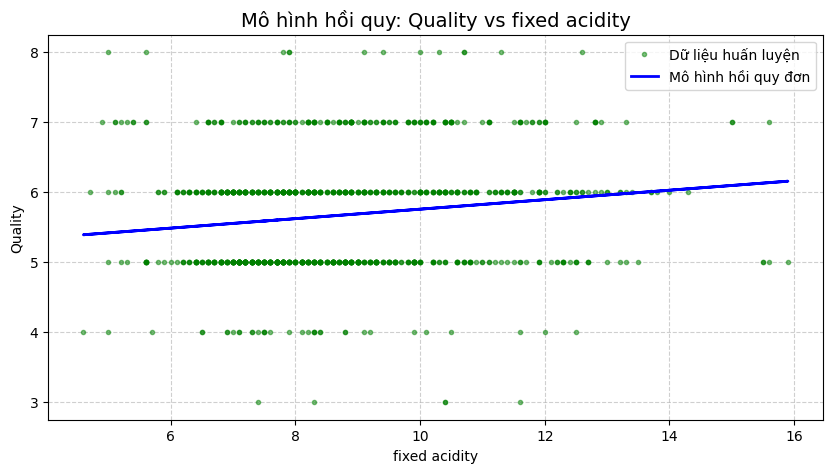

------------------------------
Đặc trưng: volatile acidity
quality = 6.5556 - 1.7162 * volatile acidity
RSS = 671.9006



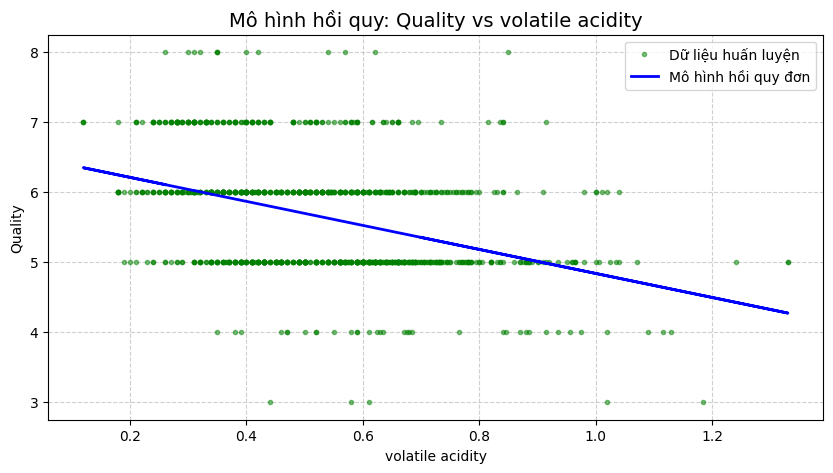

------------------------------
Đặc trưng: citric acid
quality = 5.3893 + 0.9390 * citric acid
RSS = 744.3253



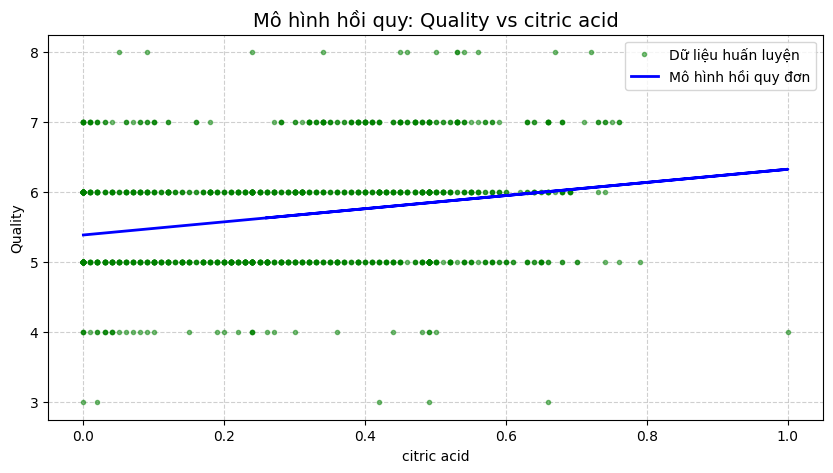

------------------------------
Đặc trưng: residual sugar
quality = 5.5842 + 0.0314 * residual sugar
RSS = 783.3308



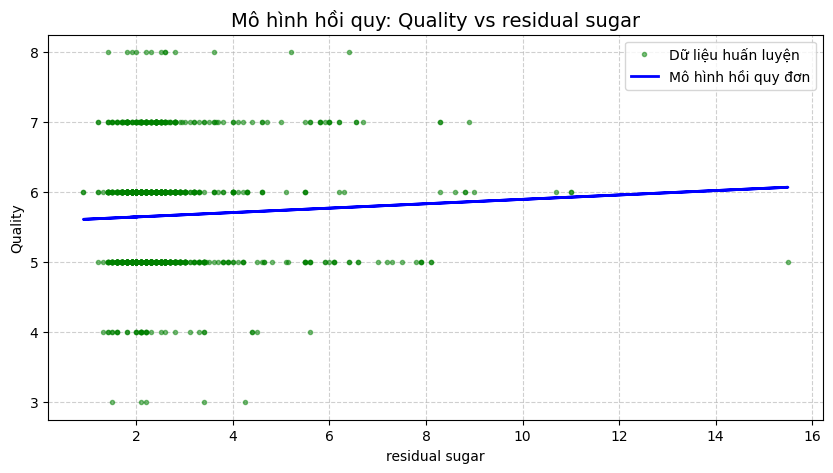

------------------------------
Đặc trưng: chlorides
quality = 5.8509 - 2.0858 * chlorides
RSS = 773.0529



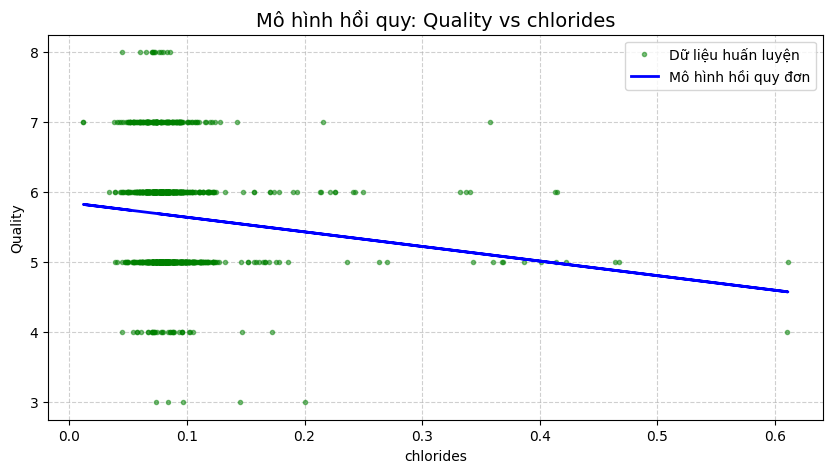

------------------------------
Đặc trưng: free sulfur dioxide
quality = 5.7553 - 0.0059 * free sulfur dioxide
RSS = 780.8043



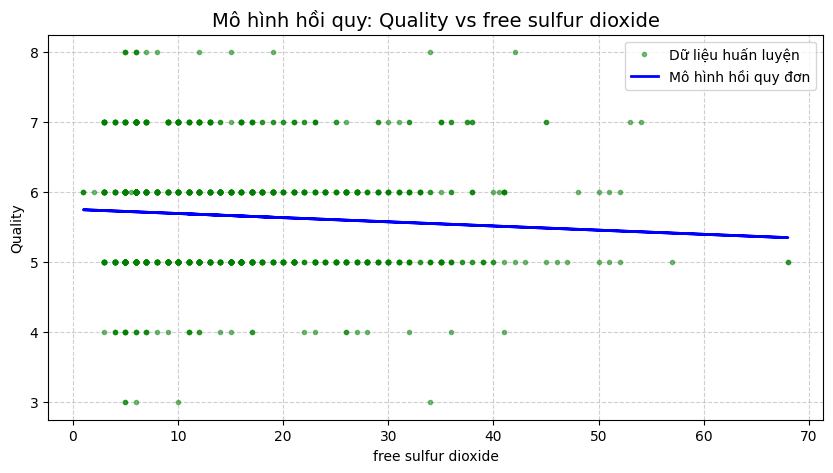

------------------------------
Đặc trưng: total sulfur dioxide
quality = 5.9184 - 0.0054 * total sulfur dioxide
RSS = 744.7977



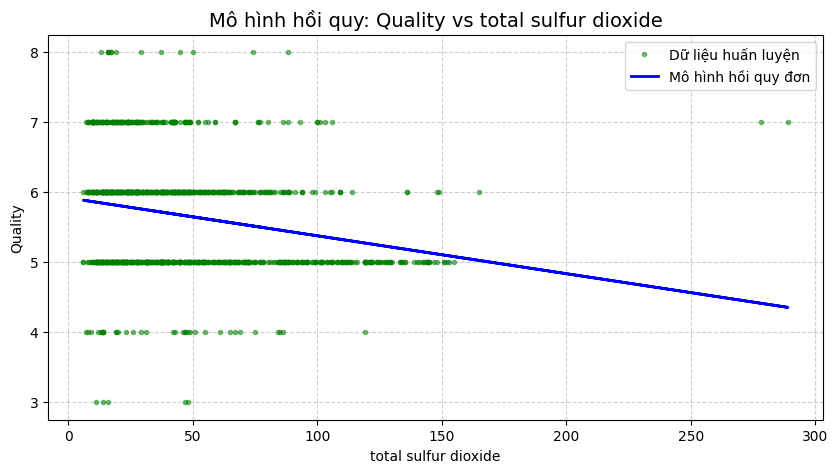

------------------------------
Đặc trưng: density
quality = 88.3881 - 82.9674 * density
RSS = 756.1312



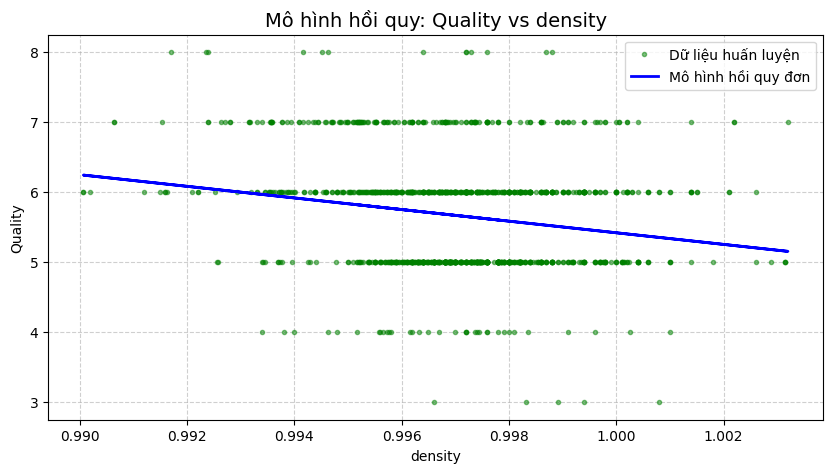

------------------------------
Đặc trưng: pH
quality = 6.9587 - 0.3923 * pH
RSS = 780.7223



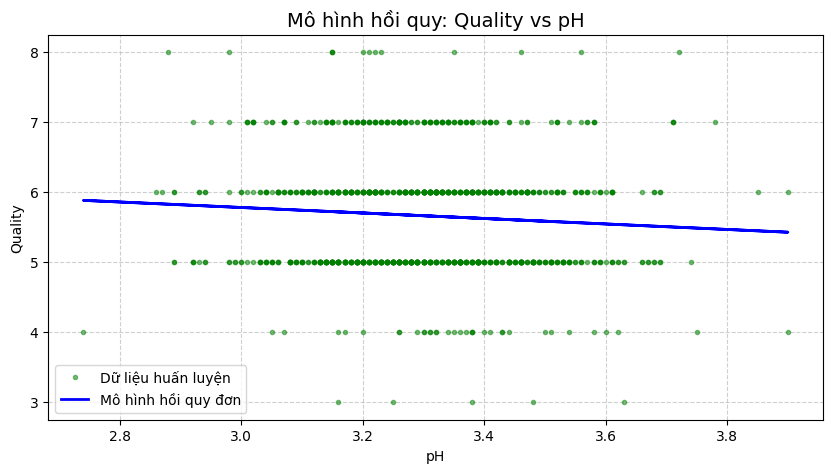

------------------------------
Đặc trưng: sulphates
quality = 5.0171 + 0.9728 * sulphates
RSS = 750.1327



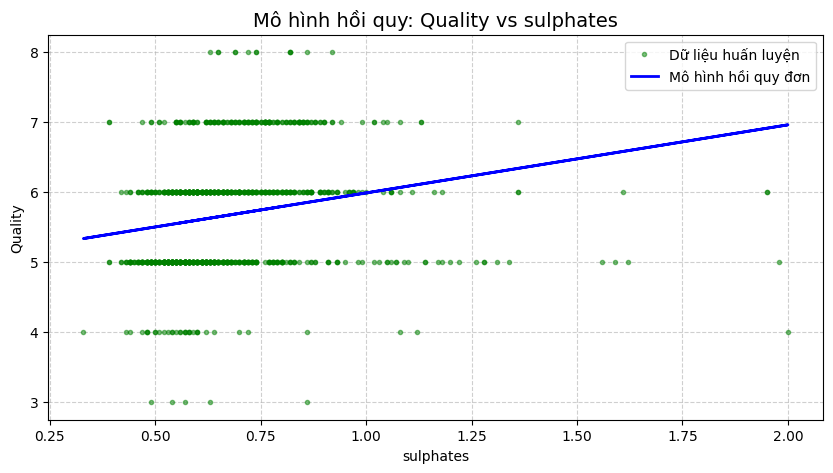

------------------------------
Đặc trưng: alcohol
quality = 1.7741 + 0.3747 * alcohol
RSS = 584.6750



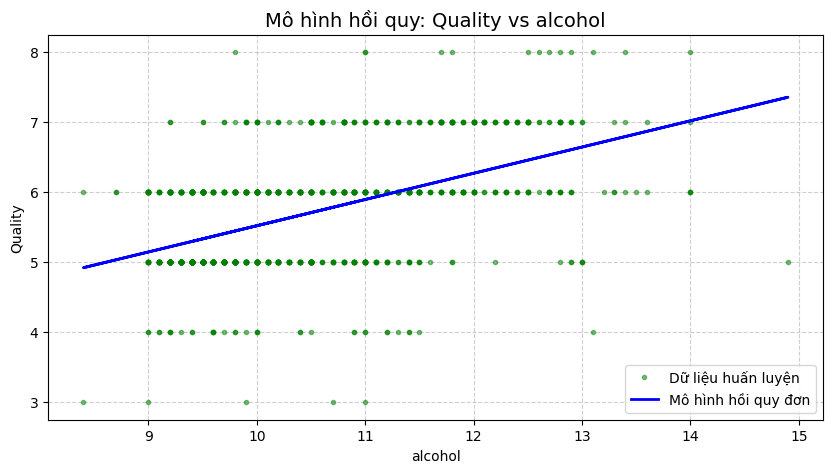

------------------------------

--- Kết quả đánh giá đặc trưng đơn lẻ ---
Đặc trưng đơn lẻ tốt nhất (RSS thấp nhất): 'alcohol' với RSS = 584.6750
Mô hình tương ứng:
quality = 1.7741 + 0.3747 * alcohol


In [12]:
# Danh sách các đặc trưng
feature_cols_single = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target_col = 'quality'

# Lưu trữ RSS và hệ số của từng mô hình
rss_values = {}
beta_values_singular = {}
best_feature = None
min_rss = float('inf') # Giá trị vô cùng lớn ban đầu

# Lặp qua từng đặc trưng
print("\n--- Đánh giá từng đặc trưng bằng hồi quy đơn và RSS ---\n")
for feature in feature_cols_single:
    print(f"Đặc trưng: {feature}")
    X_single = df[feature].values.tolist()
    Y = df[target_col].values.tolist()

    try:
        # Tính hệ số beta
        beta = coef_singular(X_single, Y)
        beta_values_singular[feature] = beta
        print_model_singular(feature, beta)

        # Tính giá trị dự đoán
        Y_pred = predict_singular(X_single, beta)

        # Tính RSS
        rss = residual_sum_of_squares(Y, Y_pred)
        rss_values[feature] = rss
        print(f"RSS = {rss:.4f}\n")

        # Cập nhật đặc trưng tốt nhất
        if rss < min_rss:
            min_rss = rss
            best_feature = feature

        # Vẽ đồ thị (có thể comment dòng này nếu không muốn xem tất cả đồ thị)
        drawSingular(X_single, Y, feature)
        print("-" * 30)

    except ValueError as e:
        print(f"Không thể tính hồi quy cho '{feature}': {e}\n")
        print("-" * 30)
        continue # Bỏ qua đặc trưng này nếu có lỗi

# In ra đặc trưng tốt nhất dựa trên RSS
print("\n--- Kết quả đánh giá đặc trưng đơn lẻ ---")
if best_feature:
    print(f"Đặc trưng đơn lẻ tốt nhất (RSS thấp nhất): '{best_feature}' với RSS = {min_rss:.4f}")
    print(f"Mô hình tương ứng:")
    print_model_singular(best_feature, beta_values_singular[best_feature])
else:
    print("Không tìm thấy đặc trưng tốt nhất (có thể do lỗi tính toán).")

$\Rightarrow$ Dựa vào các mô hình đánh giá chất lượng rượu, trực quan và cả RSS theo từng đặc trưng ta có thể kết luận được rằng: Khi sử dụng đặc trưng **"alcohol"** sẽ cho ra kết quả tốt nhất. Vì RSS của mô hình này là nhỏ nhất (RSS = 584.6750).

##### c. Xây dựng mô hình riêng để đánh giá chất lượng rượu cho kết quả tốt nhất.
- Dựa trên kết quả phân tích ở phần b, ta thấy đặc trưng 'alcohol' có RSS thấp nhất (khoảng 584.67), cho thấy nó là yếu tố dự đoán chất lượng rượu tốt nhất khi đứng một mình. Các đặc trưng tiếp theo có RSS tương đối thấp là 'volatile acidity' (khoảng 671.90) và 'sulphates' (khoảng 717.31), 'citric acid' (khoảng 744.33), 'total sulfur dioxide' (khoảng 744.80).

+ Để xây dựng mô hình tùy chỉnh tốt hơn, ta có thể kết hợp các đặc trưng có khả năng dự đoán tốt (RSS thấp). Ta sẽ thử xây dựng mô hình hồi quy bội với 3 đặc trưng có RSS thấp nhất trong phân tích đơn biến: 'alcohol', 'volatile acidity', và 'sulphates'.
*(Lưu ý: Việc lựa chọn này dựa trên phân tích đơn biến, chưa xét đến tương quan giữa các đặc trưng. Các phương pháp lựa chọn đặc trưng nâng cao hơn có thể cho kết quả khác)*

In [13]:
# Chọn các đặc trưng tốt nhất dựa trên phân tích RSS ở phần b
# Hoặc theo lựa chọn của notebook gốc: 'alcohol', 'volatile acidity', 'citric acid'
# custom_features = ['alcohol', 'volatile acidity', 'sulphates']
custom_features = ['alcohol', 'volatile acidity', 'citric acid'] # Theo notebook gốc
print(f"Xây dựng mô hình tùy chỉnh với các đặc trưng: {custom_features}")

# Chuẩn bị dữ liệu
X_custom = df[custom_features].values.tolist()
Y = df['quality'].values.tolist()

# Tính toán vector hệ số beta
print("\nTính toán hệ số cho mô hình hồi quy bội tùy chỉnh...")
beta_hat_custom = coef_multiple(X_custom, Y)

# In mô hình hồi quy tùy chỉnh
print("\nMô hình hồi quy tuyến tính bội (tùy chỉnh):")
print_regression_model(custom_features, beta_hat_custom)

# (Tùy chọn) Tính RSS cho mô hình tùy chỉnh để so sánh
if beta_hat_custom is not None:
    # Cần hàm dự đoán cho hồi quy bội
    def predict_multiple(X_features, beta_hat):
        X_with_intercept = add_intercept(X_features)
        # Hàm multiply_matrix đã xử lý vector cột cho beta_hat
        y_pred = multiply_matrix(X_with_intercept, beta_hat) 
        return y_pred

    Y_pred_custom = predict_multiple(X_custom, beta_hat_custom)
    rss_custom = residual_sum_of_squares(Y, Y_pred_custom)
    print(f"\nRSS của mô hình tùy chỉnh: {rss_custom:.4f}")
else:
    print("\nKhông thể tính RSS do lỗi tính toán mô hình.")

Xây dựng mô hình tùy chỉnh với các đặc trưng: ['alcohol', 'volatile acidity', 'citric acid']

Tính toán hệ số cho mô hình hồi quy bội tùy chỉnh...

Mô hình hồi quy tuyến tính bội (tùy chỉnh):
quality = 2.9156 + 0.3303 * alcohol - 1.3035 * volatile acidity - 0.0142 * citric acid

RSS của mô hình tùy chỉnh: 522.9713


## 3. Mô tả các hàm đã cài đặt

Dưới đây là mô tả ngắn gọn các hàm đã được cài đặt thủ công để thực hiện các yêu cầu của đồ án:

### Các hàm tính tổng:
-   `custom_sum(X)`: Tính tổng các phần tử trong list `X`.
-   `custom_sumXY(X, Y)`: Tính tổng tích các cặp phần tử tương ứng trong list `X` và `Y`.
-   `custom_sum_sq(X)`: Tính tổng bình phương các phần tử trong list `X`.
-   `residual_sum_of_squares(y_true, y_pred)`: Tính tổng bình phương sai số (RSS) giữa giá trị thực `y_true` và giá trị dự đoán `y_pred`.

### Các hàm xử lý ma trận:
-   `trans_matrix(M)`: Tính ma trận chuyển vị của ma trận `M` (dạng list of lists).
-   `multiply_matrix(A_list, B_list)`: Nhân ma trận `A_list` với ma trận hoặc vector cột `B_list`.
-   `get_identity_matrix(n)`: Tạo ma trận đơn vị cấp `n`.
-   `inverse_matrix(A)`: Tính ma trận nghịch đảo của ma trận vuông `A` bằng phương pháp khử Gauss-Jordan. Báo lỗi nếu ma trận không khả nghịch.
-   `add_intercept(X)`: Thêm một cột gồm các giá trị 1 vào đầu ma trận đặc trưng `X`.

### Các hàm cài đặt OLS:
-   `coef_singular(X_feature, Y)`: Tính các hệ số hồi quy ($\beta_0, \beta_1$) cho mô hình hồi quy tuyến tính đơn dựa trên công thức OLS.
-   `coef_multiple(X_features, Y)`: Tính vector hệ số hồi quy ($\beta$) cho mô hình hồi quy tuyến tính bội dựa trên công thức OLS dạng ma trận.

### Các hàm hiển thị và vẽ đồ thị:
-   `print_regression_model(feature_names, beta_hat)`: In ra phương trình hồi quy tuyến tính bội một cách dễ đọc.
-   `print_model_singular(feature_name, beta)`: In ra phương trình hồi quy tuyến tính đơn.
-   `predict_singular(x_values, coef)`: Dự đoán giá trị Y cho hồi quy đơn từ các giá trị X và hệ số đã tính.
-   `predict_multiple(X_features, beta_hat)`: Dự đoán giá trị Y cho hồi quy bội từ ma trận `X` và vector hệ số `beta_hat`.
-   `drawSingular(x, y, feature_name)`: Vẽ biểu đồ phân tán (scatter plot) của dữ liệu và đường hồi quy tuyến tính đơn tương ứng.